In [1]:
library(corrplot)

data(iris)

head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


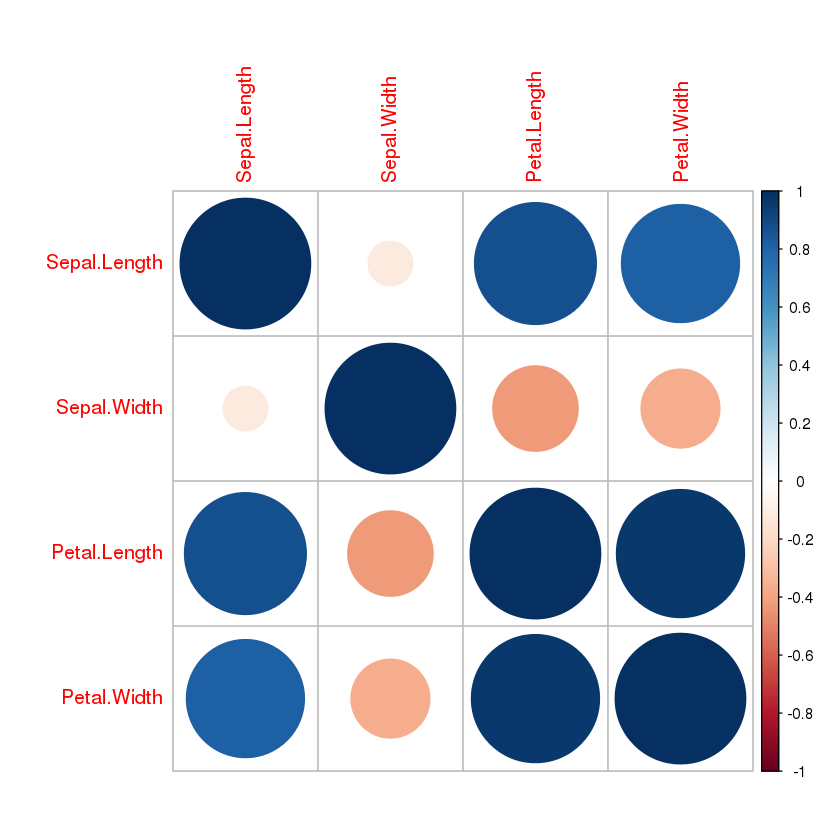

In [2]:
corrplot(cor(iris[,1:4]))

[1] 681.3706


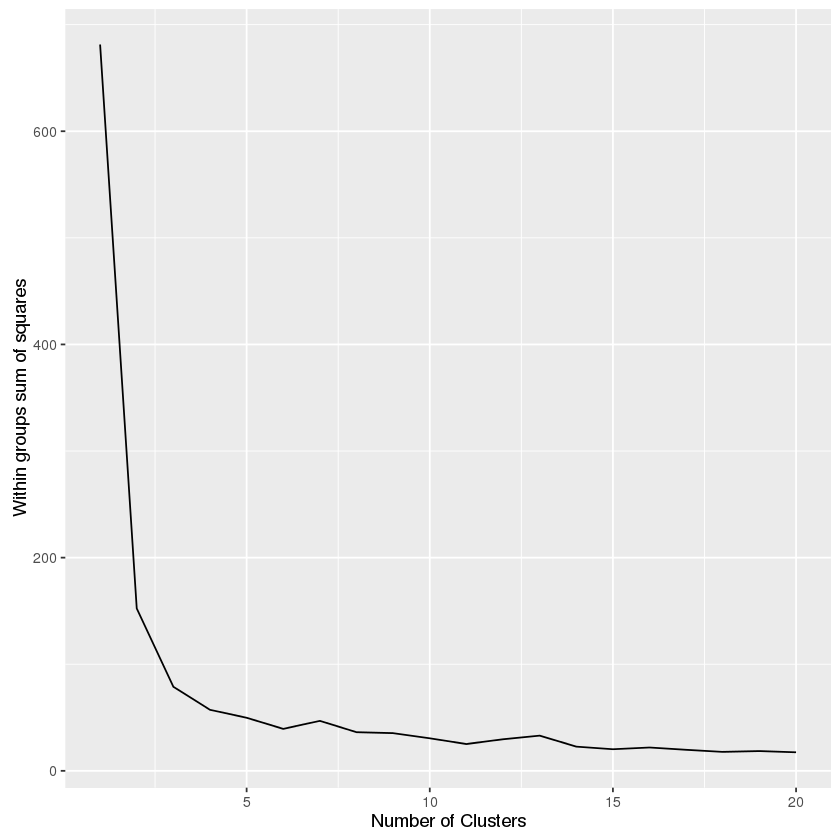

In [3]:
library(ggplot2)

X <- iris[,1:4]
wss <- (nrow(X)-1)*sum(apply(X,2,var))
print (wss)

for (i in 2:20) {
    wss[i] <- sum(kmeans(X, centers=i, iter.max=100)$withinss)
}

wss.df <- (data.frame(n=1:20, wss=wss))

ggplot(wss.df, aes(n, wss)) + geom_line() + 
    xlab("Number of Clusters") + ylab("Within groups sum of squares")


In [6]:
km <- kmeans(X, centers = 4, iter.max = 100)
km

K-means clustering with 4 clusters of sizes 32, 28, 50, 40

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1     6.912500    3.100000     5.846875    2.131250
2     5.532143    2.635714     3.960714    1.228571
3     5.006000    3.428000     1.462000    0.246000
4     6.252500    2.855000     4.815000    1.625000

Clustering vector:
  [1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [38] 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 2 4 2 4 2 4 2 2 2 2 4 2 4 2 2 4 2 4 2 4 4
 [75] 4 4 4 4 4 2 2 2 2 4 2 4 4 4 2 2 2 4 2 2 2 2 2 4 2 2 1 4 1 1 1 1 2 1 1 1 4
[112] 4 1 4 4 1 1 1 1 4 1 4 1 4 1 1 4 4 1 1 1 1 1 4 4 1 1 1 4 1 1 1 4 1 1 1 4 4
[149] 1 4

Within cluster sum of squares by cluster:
[1] 18.703437  9.749286 15.151000 13.624750
 (between_SS / total_SS =  91.6 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [7]:
table(km$cluster, iris$Species)

   
    setosa versicolor virginica
  1      0          0        32
  2      0         27         1
  3     50          0         0
  4      0         23        17